# 1. Preparation

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## 1.2 Import Datasets

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

## 1.3 Normalize Data

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

## 1.4 Visualize Data

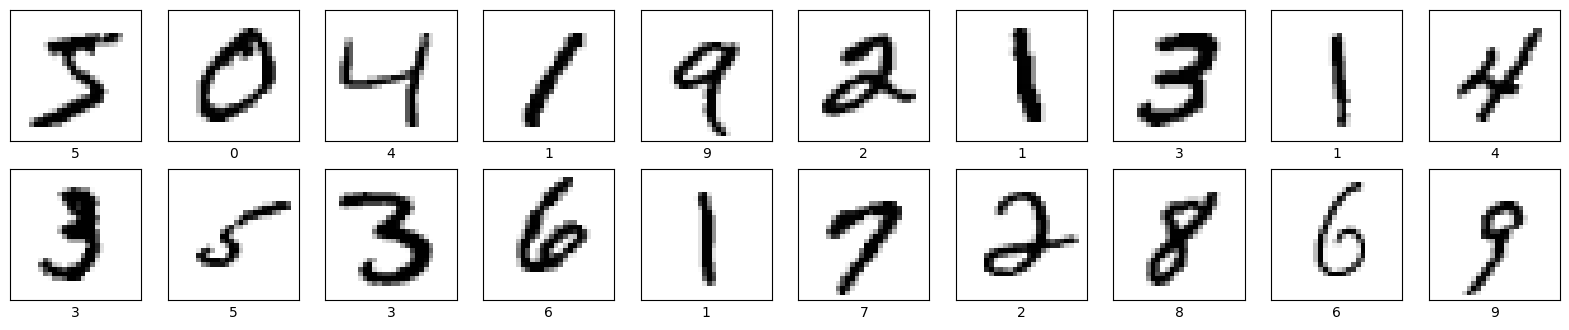

In [4]:
plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## 1.5 Adjust Data Shape
### Shape Adjustment
From (60000, 28, 28) to (60000, 28, 28, 1)
This adds a channel dimension, which is required for convolutional neural networks (CNNs).
- The 1 indicates grayscale (1 channel).
- If it were RGB images, it would be 3 channels.
### Normalization
Normalizes the pixel values from the range [0, 255] to [0.0, 1.0]
NNs train better and faster when input values are small and normalized.

In [5]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

# 2. CNN Model Building

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),#卷积层1，卷积核3*3
    layers.MaxPooling2D((2, 2)),                   #池化层1，2*2采样
    layers.Conv2D(64, (3, 3), activation='relu'),  #卷积层2，卷积核3*3
    layers.MaxPooling2D((2, 2)),                   #池化层2，2*2采样
    
    layers.Flatten(),                              #Flatten层，连接卷积层与全连接层
    layers.Dense(64, activation='relu'),     #全连接层，特征进一步提取
    layers.Dense(10)                               #输出层，输出预期结果
])
# 打印网络结构
model.summary()

/Users/administrator/Documents/GitHub/chrome_dino/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

3. Model Compilation
- Optimizer: Adam
- Loss Function: Sparse Categorical Crossentropy
- Metrics: Accuracy

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 4. Model Training
- Training images
- Training labels
- Validation images
- Validation labels
- epochs: 10


In [8]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.5742 - loss: 1.2252 - val_accuracy: 0.9124 - val_loss: 0.2875
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9180 - loss: 0.2698 - val_accuracy: 0.9479 - val_loss: 0.1641
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9516 - loss: 0.1627 - val_accuracy: 0.9653 - val_loss: 0.1144
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9638 - loss: 0.1183 - val_accuracy: 0.9718 - val_loss: 0.0903
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9686 - loss: 0.0988 - val_accuracy: 0.9734 - val_loss: 0.0852
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9725 - loss: 0.0848 - val_accuracy: 0.9765 - val_loss: 0.0712
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9754 - loss: 0.0808 - val_accuracy: 0.9774 - val_loss: 0.0680
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9781 - loss: 

# 5. Prediction
- Input a image
- get the pro

```mermaid
graph LR
    A[输入层<br/>28×28×1] --> B[卷积层1<br/>32个3×3卷积核<br/>stride=1<br/>输出: 26×26×32]
    B --> C[池化层1<br/>2×2采样<br/>stride=2<br/>输出: 13×13×32]
    C --> D[卷积层2<br/>32个3×3卷积核<br/>stride=1<br/>输出: 11×11×64]
    D --> E[池化层2<br/>2×2采样<br/>stride=2<br/>输出: 5×5×64]
    E --> F[Flatten层<br/>输出: 1600]
    F --> G[全连接层<br/>输出: 64]
    G --> H[输出层<br/>输出: 10]
```

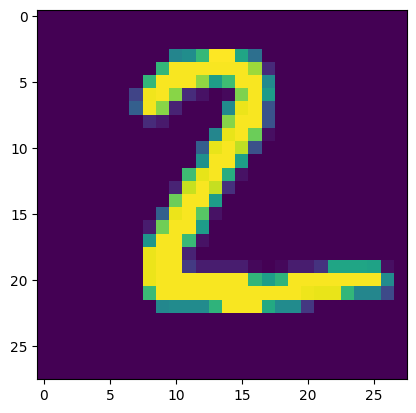

In [9]:
plt.imshow(test_images[1])

In [10]:
pre = model.predict(test_images)
pre[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([  2.5302758 ,   2.1827106 ,  11.890993  ,   1.6068985 ,
        -6.716368  ,  -5.872372  ,   0.87179273,  -9.230475  ,
         0.9929472 , -10.032824  ], dtype=float32)